# Time Series

> ARIMA

This notebook is a practice of ARIMA.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt

In [2]:
# pd.read_csv generate DataFrame by default
df = pd.read_csv('Air.csv') 
# Convert string index to time index
df.index = pd.to_datetime(df['Date'])  
# Generate a pd.Series object
ts = df['PM2.5']  

ts.head()

Date
2018-01-01    93
2018-01-02    27
2018-01-03    21
2018-01-04     8
2018-01-05    26
Name: PM2.5, dtype: int64

In [3]:
# check index format
ts.head().index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [4]:
# Use a string as an index
ts['2018-05-29']

100

In [5]:
# Use a time object as an index
ts[datetime(2018,5,29)]

100

In [6]:
# Get data for a month
ts['2018-5']

Date
2018-05-01     45
2018-05-02     53
2018-05-03     31
2018-05-04     40
2018-05-05     24
2018-05-06     41
2018-05-07     29
2018-05-08     32
2018-05-09     30
2018-05-10     21
2018-05-11     20
2018-05-12     70
2018-05-13     71
2018-05-14     52
2018-05-15     47
2018-05-16     39
2018-05-17     35
2018-05-18     46
2018-05-19     27
2018-05-20     12
2018-05-21     19
2018-05-22     23
2018-05-23     32
2018-05-24     31
2018-05-25     23
2018-05-26     29
2018-05-27     34
2018-05-28     73
2018-05-29    100
2018-05-30     80
2018-05-31     48
Name: PM2.5, dtype: int64

In [7]:
# Slicing (both start date and end date are inclusive)
ts['2018-5-24' : '2018-5-29']

Date
2018-05-24     31
2018-05-25     23
2018-05-26     29
2018-05-27     34
2018-05-28     73
2018-05-29    100
Name: PM2.5, dtype: int64

In [8]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [9]:
# Define a sequence diagram function
def draw_ts(timeSeries):
    f = plt.figure(facecolor='white')
    timeSeries.plot(color='blue')
    plt.show()

In [10]:
# Define a unit root test function
def testStationarity(timeSeries):
    dftest = adfuller(timeSeries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

In [11]:
# Define autocorrelation and partial correlation plot function, set default lags=31
def draw_acf_pacf(ts, lags=31):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts, lags=31, ax=ax1)
    ax2 = f.add_subplot(212)
    plot_pacf(ts, lags=31, ax=ax2)
    plt.show()

In [12]:
# Define moving average plot function
def draw_trend(timeSeries, size):
    plt.figure(facecolor='white')
    # Perform a moving average on 'size' data
    rol_mean = timeSeries.rolling(window=size).mean()
    # Perform a weighted moving average of 'size' data
    # rol_weighted_mean = pd.ewma(timeSeries, span=size)
    rol_weighted_mean = pd.DataFrame(timeSeries).ewm(span=size).mean()

    plt.plot(timeSeries,color='blue', label='Original')
    plt.plot(rol_mean,color='red', label='Rolling Mean')
    plt.plot(rol_weighted_mean,color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

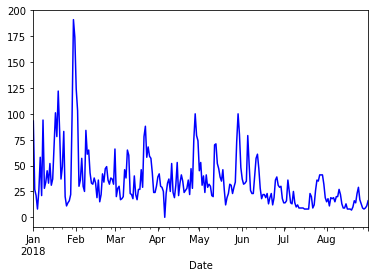

In [13]:
# Create a sequence diagram
draw_ts(ts)

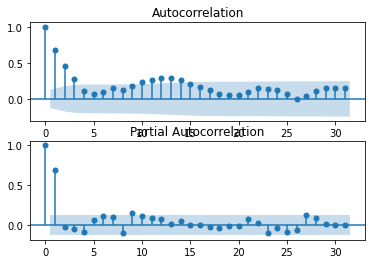

In [14]:
# Create a autocorrelation and partial autocorrelation plot
draw_acf_pacf(ts, lags=31)

In [15]:
# Unit root test
testStationarity(ts)

Test Statistic                  -2.451642
p-value                          0.127688
#Lags Used                      10.000000
Number of Observations Used    232.000000
Critical Value (1%)             -3.458855
Critical Value (5%)             -2.874080
Critical Value (10%)            -2.573453
dtype: float64

C:\Users\maryw\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


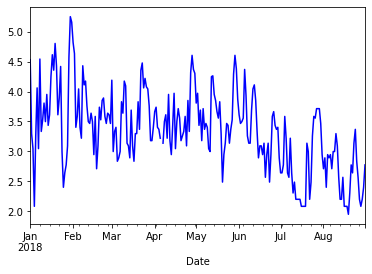

In [16]:
# Log transformation
ts_log = np.log(ts)
# Create a sequence diagram of logarithmic data
draw_ts(ts_log)

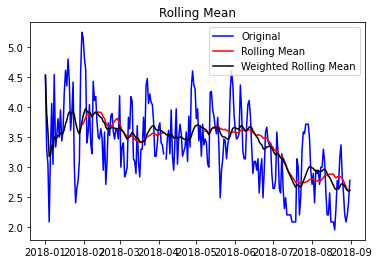

In [17]:
# Create a moving average plot of logarithmic data
draw_trend(ts_log, 30)

In [18]:
# Perform first-order difference of logarithmic data
diff_1 = ts.diff(1)
# Drop NaN
diff_1.dropna(inplace=True)
# Check the stationarity of the differenced data
testStationarity(diff_1)

Test Statistic                -8.376938e+00
p-value                        2.571070e-13
#Lags Used                     1.000000e+01
Number of Observations Used    2.310000e+02
Critical Value (1%)           -3.458980e+00
Critical Value (5%)           -2.874135e+00
Critical Value (10%)          -2.573482e+00
dtype: float64

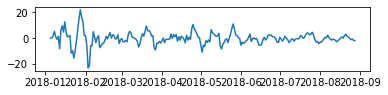

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(diff_1, model="additive")

# Separate time series data into long-term trends
fig1 = plt.subplot(311)
trend = decomposition.trend
plt.plot(trend)

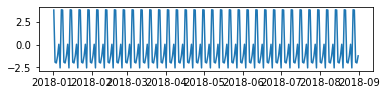

In [20]:
# Separate time series data into seasonal trends
fig2 = plt.subplot(312)
seasonal = decomposition.seasonal
plt.plot(seasonal)

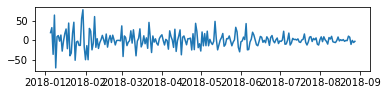

In [21]:
# Separate time series data into random components (residuals)
fig3 = plt.subplot(313)
residual = decomposition.resid
plt.plot(residual)

In [22]:
# Process annual component using a 30-step moving average
rol_mean = ts_log.rolling(window=30).mean()
rol_mean.dropna(inplace=True)
# Process long-term trend components using 1st-order differences
ts_diff_1 = rol_mean.diff(1)
ts_diff_1.dropna(inplace=True)
# check stationarity
testStationarity(ts_diff_1)

Test Statistic                -6.854861e+00
p-value                        1.658378e-09
#Lags Used                     0.000000e+00
Number of Observations Used    1.820000e+02
Critical Value (1%)           -3.466800e+00
Critical Value (5%)           -2.877555e+00
Critical Value (10%)          -2.575308e+00
dtype: float64

In [23]:
ts_diff_2 = ts_diff_1.diff(1)
ts_diff_2.dropna(inplace=True)
testStationarity(ts_diff_2)

Test Statistic                -5.694485e+00
p-value                        7.931824e-07
#Lags Used                     1.100000e+01
Number of Observations Used    1.700000e+02
Critical Value (1%)           -3.469413e+00
Critical Value (5%)           -2.878696e+00
Critical Value (10%)          -2.575917e+00
dtype: float64

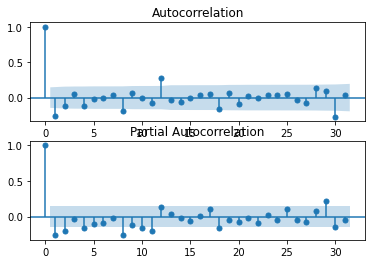

In [24]:
# Plot autocorrelation and partial correlation
draw_acf_pacf(ts_diff_2)

In [25]:
# Build ARMA(1,1) model
from statsmodels.tsa.arima_model import ARMA
model = ARMA(ts_diff_2, order=(1, 1)) 
result_arma = model.fit( disp=-1, method='css')

C:\Users\maryw\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\maryw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [26]:
# Make predictions
predict_ts = result_arma.predict()
# Reverse first-order difference
diff_shift_ts = ts_diff_1.shift(1)
diff_recover_1 = predict_ts.add(diff_shift_ts)
# Reverse first-order difference again
rol_shift_ts = rol_mean.shift(1)
diff_recover = diff_recover_1.add(rol_shift_ts)
# reverse moving average
rol_sum = ts_log.rolling(window=11).sum()
rol_recover = diff_recover*12 - rol_sum.shift(1)
# reverse log trandformation
log_recover = np.exp(rol_recover)
log_recover.dropna(inplace=True)

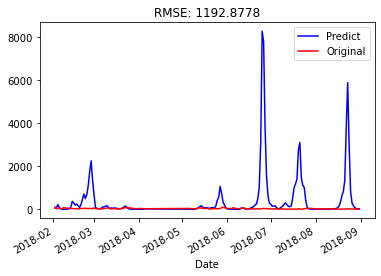

In [27]:
# Filter records without prediction results
ts = ts[log_recover.index]
# Create a seuqence diagram based on original data and predictions
plt.figure(facecolor='white')
log_recover.plot(color='blue', label='Predict')
ts.plot(color='red', label='Original')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((log_recover-ts)**2)/ts.size))
plt.show()

In [28]:
from __future__ import print_function
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

<AxesSubplot:>

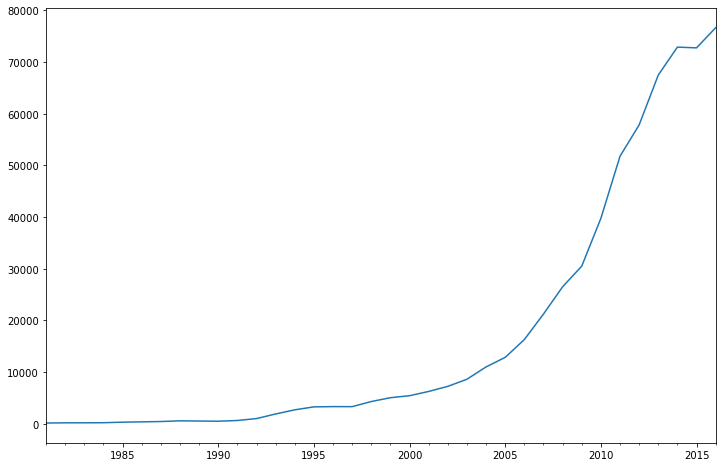

In [29]:
colum=[149.2,190.9,193.8,208.2,314.8,375.6,440.40,578.8,531.4,498.3,640.8,1013.5,1904.1,2704.2,3278.2,3326.2,3319.7,4310.8,5050.9,5435.3,6261.5,7248.9,8624.8,11010.1,12858.8,16305.5,21238.3,26516.1,30514.7,39763.1,51773.4,57844.3,67483.4,72888.4,72746.0,76649.3]
dta=pd.Series(colum)
dta.index=pd.Index(sm.tsa.datetools.dates_from_range('1981','2016'))
dta.plot(figsize=(12,8))